In [2]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScaler,StandardScaler
#from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ardahk/amex/main/data/final_data.csv')

In [4]:
df.columns

Index(['order_id', 'user_id', 'gender', 'num_of_item', 'id_orders',
       'product_id', 'order_created_at', 'status_cancelled', 'status_complete',
       'status_processing', 'status_returned', 'status__shipped', 'age',
       'state_orders', 'postal_code_orders', 'traffic_source_orders', 'cost',
       'category', 'name', 'brand', 'retail_price', 'department', 'id_events',
       'sequence_number', 'created_at', 'state_events', 'postal_code_events',
       'browser', 'traffic_source_events', 'event_type'],
      dtype='object')

In [5]:
print(df['id_events'].nunique())
print(df['id_orders'].nunique())
print(df['created_at'].nunique())

19694
19694
19692


Notice that this dataset has a bunch of columns that were necessary for merging but not necessary for prediction. Dropping the following columns: `id_events`, `id_orders`, `created_at`, `sequence_number`

In [6]:
cols = ["id_events", "id_orders", "created_at", "sequence_number"]
df = df.drop(columns=cols)

Text(0.5, 1.0, 'Correlation Heatmap (Numerical columns only)')

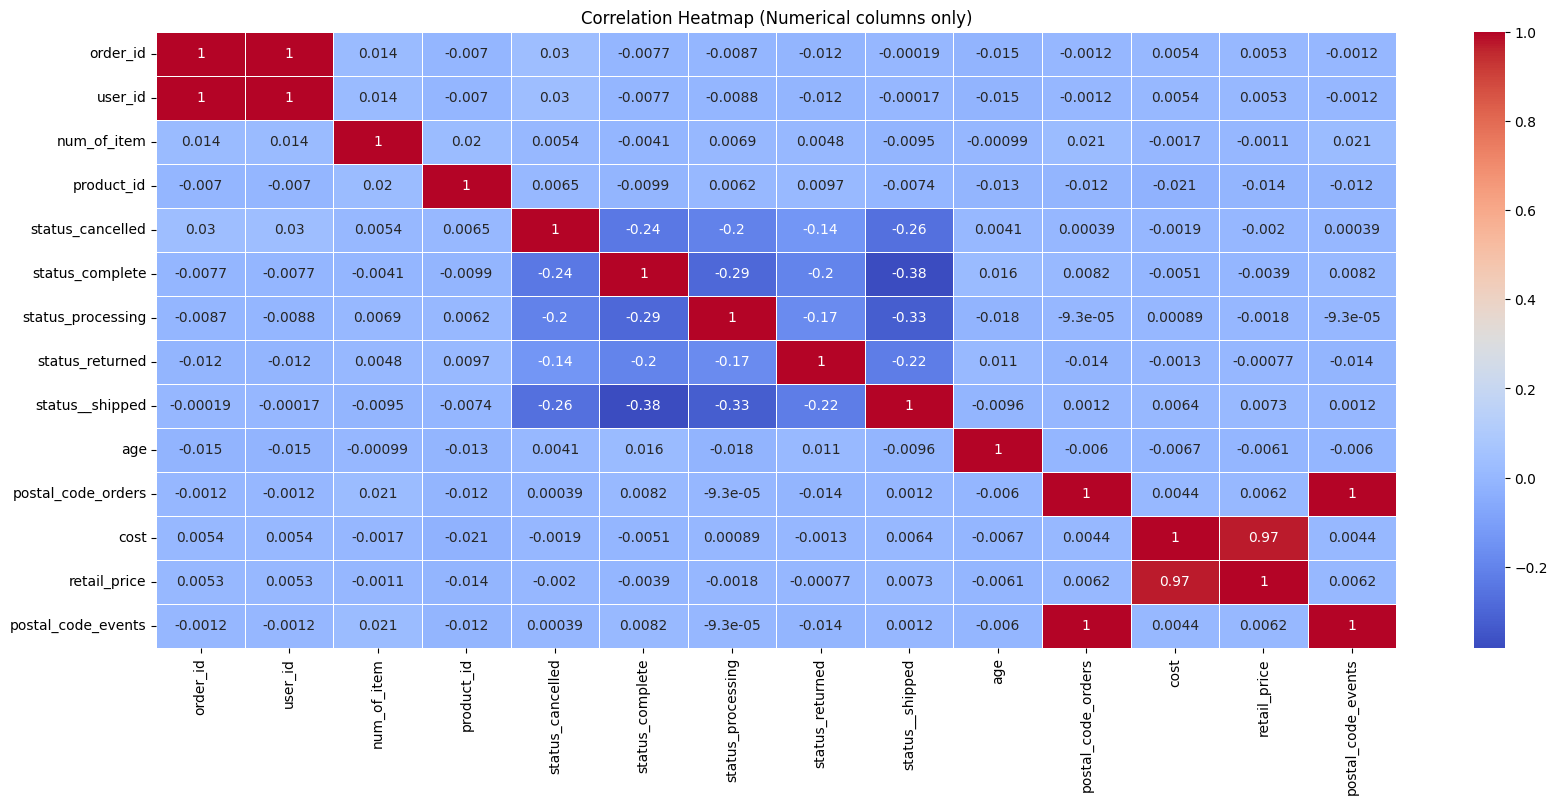

In [7]:
#Examining correlation matrix
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numerical columns only)")

Notice that some of the columns have a logical correlation (e.g `orders_complete` correlates to `orders_shipped` which makes sense because all complete orders have to have been shipped first)

Other notable correlated pairs:
* `retail_price` and `cost` (0.97)

### Model #1

* Model Type: Neural network ()
* Label: 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19696 entries, 0 to 19695
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               19696 non-null  int64  
 1   user_id                19696 non-null  int64  
 2   gender                 19696 non-null  object 
 3   num_of_item            19696 non-null  int64  
 4   product_id             19696 non-null  int64  
 5   order_created_at       19696 non-null  object 
 6   status_cancelled       19696 non-null  int64  
 7   status_complete        19696 non-null  int64  
 8   status_processing      19696 non-null  int64  
 9   status_returned        19696 non-null  int64  
 10  status__shipped        19696 non-null  int64  
 11  age                    19696 non-null  int64  
 12  state_orders           19696 non-null  object 
 13  postal_code_orders     19696 non-null  int64  
 14  traffic_source_orders  19696 non-null  object 
 15  co

In [9]:
#Distribution of status
status = ['status_cancelled', 'status_complete', 'status_processing', 'status_returned', 'status__shipped']
for val in status:
    present = df[val].sum()
    total = df[val].count()
    percentage = present/total * 100
    print(f"{val}: {round(percentage,2)}%")

status_cancelled: 14.15%
status_complete: 25.58%
status_processing: 20.15%
status_returned: 10.39%
status__shipped: 29.73%


In [11]:
df['gender'].value_counts()

gender
F    9860
M    9836
Name: count, dtype: int64

In [12]:
df['brand'].nunique()

2088

In [13]:
df['department'].value_counts()

department
Women    9860
Men      9836
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19696 entries, 0 to 19695
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               19696 non-null  int64  
 1   user_id                19696 non-null  int64  
 2   gender                 19696 non-null  object 
 3   num_of_item            19696 non-null  int64  
 4   product_id             19696 non-null  int64  
 5   order_created_at       19696 non-null  object 
 6   status_cancelled       19696 non-null  int64  
 7   status_complete        19696 non-null  int64  
 8   status_processing      19696 non-null  int64  
 9   status_returned        19696 non-null  int64  
 10  status__shipped        19696 non-null  int64  
 11  age                    19696 non-null  int64  
 12  state_orders           19696 non-null  object 
 13  postal_code_orders     19696 non-null  int64  
 14  traffic_source_orders  19696 non-null  object 
 15  co